# Homework Assignment 3

Using the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) and TuriCreate please, answer the following questions:

In [2]:
# !apt install libnvrtc8.0
# !pip uninstall -y mxnet-cu80 && pip install mxnet-cu80==1.1.0
# !pip install turicreate
# !pip install --upgrade seaborn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Skipping mxnet-cu80 as it is not installed.
    100% |████████████████████████████████| 274.9MB 110kB/s 
    100% |████████████████████████████████| 17.0MB 2.1MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.13.3 which is incompatible.
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.13.3 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
fastai 1.0.49 has requirement numpy>=1.15, but you'll have numpy 1.13.3 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
cvxpy 1.0.15 has requirement numpy>=1.14, but you'll have numpy 1.13.3 which is incompatible.
albumenta

In [1]:
import turicreate as tc
import turicreate.aggregate as agg
import seaborn as sns
import json
import os
import re
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("drive/Team Drives/BigData")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


**Question 1:** Write a function that returns the most popular book in each subject. Use it to find the most popular book in
    the _Mystery Fiction_ subject (15pt)

In [2]:
library_sf = tc.SFrame.read_csv('library-collection-inventory.csv')

Finished parsing file /content/drive/Team Drives/BigData/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 4.2936 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 159974 lines. Lines per second: 86986.5

Read 957811 lines. Lines per second: 114272

Read 1436407 lines. Lines per second: 100695

Read 1755988 lines. Lines per second: 90333.6

Read 2235229 lines. Lines per second: 87418.3

Read 2554997 lines. Lines per second: 83260.6

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3034525 lines. Lines per second: 82078.1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3353566 lines. Lines per second: 79119.6

Read 3832496 lines. Lines per second: 78754

Read 4152014 lines. Lines per second: 77165.4

Read 4631080 lines. Lines per second: 76769.2

Read 4950326 lines. Lines per second: 75547.3

Read 5429098 lines. Lines per second: 75289.7

Read 5748785 lines. Lines per second: 74116.8

Read 6067813 lines. Lines per second: 73043.7

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

Read 6547388 lines. Lines per second: 72133.5

Read 7026491 lines. Lines per second: 72067

Read 7345581 lines. Lines per second: 71402.7

Read 7823429 lines. Lines per second: 71221.1

Read 8143040 lines. Lines per second: 70883.3

Read 8621872 lines. Lines per second: 70569.3

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-09-01 ... :00:00.000
	8: 1

Read 8941330 lines. Lines per second: 70085.7

Read 9420207 lines. Lines per second: 70313.2

Read 9739794 lines. Lines per second: 69684.1

Read 10218847 lines. Lines per second: 69500

Read 10697576 lines. Lines per second: 69534.2

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 1

Read 11017059 lines. Lines per second: 69042.9

Read 11496281 lines. Lines per second: 69040.3

Read 11815806 lines. Lines per second: 68642.3

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 12294752 lines. Lines per second: 68543.5

Read 12613683 lines. Lines per second: 68260.8

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 13092916 lines. Lines per second: 67665.5

Read 13572156 lines. Lines per second: 67970.4

Read 13891995 lines. Lines per second: 67675.4

Read 14370982 lines. Lines per second: 67676.4

Read 14690303 lines. Lines per second: 67341.6

Read 15168504 lines. Lines per second: 67317.6

Read 15487565 lines. Lines per second: 67074

Read 15966786 lines. Lines per second: 66991.4

Read 16286441 lines. Lines per second: 66738

Read 16765254 lines. Lines per second: 66765.9

Read 17244040 lines. Lines per second: 66838

Read 17563545 lines. Lines per second: 66637.8

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 6

Read 18042261 lines. Lines per second: 66636.2

Read 18361424 lines. Lines per second: 66440.4

Read 18840182 lines. Lines per second: 66441.1

Read 19159341 lines. Lines per second: 66364.7

Read 19318911 lines. Lines per second: 62129

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 19638159 lines. Lines per second: 62125.2

Read 20117130 lines. Lines per second: 62125.6

Read 20436329 lines. Lines per second: 62031.2

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 20915084 lines. Lines per second: 62139.5

Read 21234717 lines. Lines per second: 62044.6

Read 21713103 lines. Lines per second: 62165.4

Read 22191680 lines. Lines per second: 62447.6

11 lines failed to parse correctly

Finished parsing file /content/drive/Team Drives/BigData/library-collection-inventory.csv

Parsing completed. Parsed 22839622 lines in 360.306 secs.

In [0]:
r = re.compile('\\d{4}')
def get_year(y_str):
    l = r.findall(y_str) # take the first year
    if len(l) == 0:
        return None
    return int(l[0])

library_sf['year'] = library_sf['PublicationYear'].apply(lambda s: get_year(s))
library_sf2 = library_sf['BibNum', 'Title', 'Author', 'year', 'Subjects']
library_sf2['subject_list'] = library_sf2['Subjects'].apply(lambda s: s.split(","))
library_sf2['subject_list'] = library_sf2['subject_list'].apply(lambda l: [subject.strip() for subject in l])
library_sf2 = library_sf2.remove_column('Subjects')
library_sf2 = library_sf2.unique()
library_sf2 = library_sf2.stack("subject_list", new_column_name="subject") 

In [4]:
def popular_book_by_subject(sf):
    g = sf.groupby(['subject', 'Title'],{"Count":agg.COUNT()})
    f = g.groupby(['subject'],{("most popular book"):agg.ARGMAX('Count','Title')})
    return f

res = popular_book_by_subject(library_sf2)
res[res['subject'] == 'Mystery fiction']['most popular book'][0]

'The night season / Chelsea Cain.'

**Question 2**: Find the top-10 fiction subjects (5pt), and use Seaborn to visualize the number of items over time for each subject (15pt)
    

In [5]:
g = library_sf2.groupby(['subject'],{"Count":agg.COUNT()})
res = g[g['subject'].contains('fiction')].filter_by('Nonfiction films', 'subject', exclude=True).topk('Count', k=10, reverse=False)
fiction_subjects = res['subject']
fiction_sf = library_sf2.filter_by(fiction_subjects, 'subject')['subject', 'year']
fiction_sf = fiction_sf.groupby(['subject', 'year'], {"Count": agg.COUNT()}).dropna()
fiction_subjects

dtype: str
Rows: 10
['Mystery fiction', 'Historical fiction', 'Detective and mystery fiction', 'Fantasy fiction', 'Suspense fiction', 'Science fiction', 'Domestic fiction', 'Young adult fiction', 'Psychological fiction', 'Friendship Juvenile fiction']

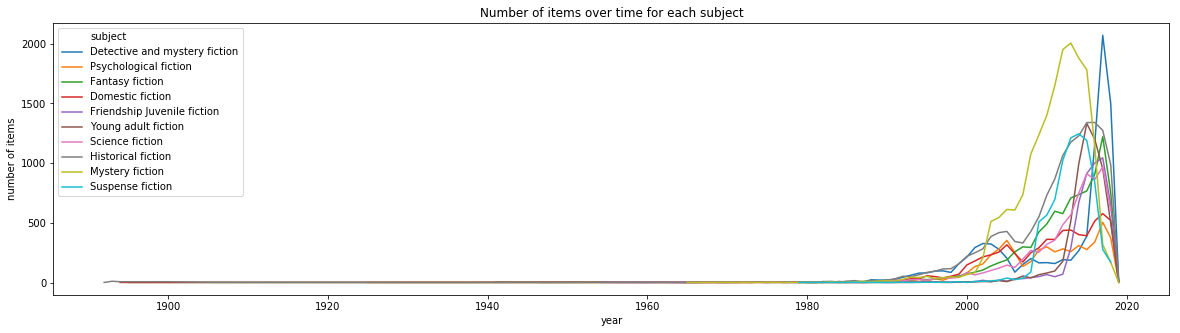

In [6]:
df = fiction_sf.to_dataframe()
plt.figure(figsize = (20, 5), facecolor = None)
sns.lineplot(x='year', y='Count', hue='subject', data=df)
plt.title('Number of items over time for each subject')
plt.xlabel('year')
plt.ylabel('number of items')
plt.show()

**Question 3:** Write a function that gets as input a subject name. The function returns the most _popular_ author for the input subject (15pt).



In [9]:
def popular_author(subject, sf):
    g = sf[sf['subject'] == subject].groupby(['Author'],{"Count":agg.COUNT()})
    return g[g['Count'].argmax()]['Author']
  
popular_author('Mystery fiction', library_sf2)

'Christie, Agatha, 1890-1976'

Using the [The Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) and TuriCreate, please answer the following questions:

**Question 4:** Calculate the average and median age of bloggers in each topic (5pt). 
Calculate the average and median age of bloggers according to their sign (5pt). 
Visualize the age distributions  of bloggers according to their  topic and gender (15pt)

In [0]:
# Prepare data - join all xml's to a json file and load it

blogger_xml_dir = "../HW3_BIG_DATA/blogs/blogs/"

def get_posts_from_file(file_name):
    posts_dict = {}
    txt = open(file_name, "r",  encoding="utf8", errors='ignore').read()
    txt = txt.replace("&nbsp;", " ")
    for p in txt.split("</post>"):
        if "<post>" not in p or "<date>" not in p:
            continue
        post = p.split("<post>")[1].strip()
        dt = p.split("</date>")[0].split("<date>")[1].strip()
        posts_dict[dt] = post

    return posts_dict
            

def blogger_xml_to_json(file_name):
    l = file_name.split("/")[-1].split(".")
    if len(l) != 6:
        raise Exception("Could not analyze file f{file_name} - Length %s" % len(l) )
    j = {"id": l[0], "gender": l[1], "age":int(l[2]), "topic":l[3], "sign": l[4], "posts": get_posts_from_file(file_name)}
    return j

all_jsons = []
for p in os.listdir(blogger_xml_dir):
    if not p.endswith(".xml"):
        continue
    print(p)
    j = blogger_xml_to_json(f"{blogger_xml_dir}/" + p)
    all_jsons.append(j)

with open('all_bloggers.json', 'w') as outfile:
    json.dump(all_jsons, outfile)

In [10]:
sf_bloggers = tc.SFrame.read_json("all_bloggers.json")

Parsing JSON records from /content/drive/Team Drives/BigData/all_bloggers.json

Successfully parsed 16140 elements from the JSON file /content/drive/Team Drives/BigData/all_bloggers.json

In [11]:
# Average and median age of bloggers in each topic

sf_topics = sf_bloggers.groupby('topic',{"mean age":agg.MEAN('age'), 'median age':agg.QUANTILE('age',[0.5])})
sf_topics['median age'] = sf_topics['median age'].apply(lambda x: x[0])
sf_topics

topic,mean age,median age
Student,17.253527751646317,16.0
Science,25.439759036144586,25.0
Non-Profit,25.03225806451614,24.0
Telecommunications,28.383838383838377,26.0
LawEnforcement-Security,24.037735849056602,24.0
Education,25.058394160583944,25.0
Agriculture,22.838709677419356,23.0
Arts,25.07413509060955,25.0
Religion,27.12173913043479,26.0
Biotech,23.591836734693878,24.0


In [12]:
# Average and median age of bloggers in each sign

sf_signs = sf_bloggers.groupby('sign',{"mean age":agg.MEAN('age'), 'median age':agg.QUANTILE('age',[0.5])})
sf_signs['median age'] = sf_signs['median age'].apply(lambda x: x[0])
sf_signs

sign,mean age,median age
Sagittarius,22.58763693270733,23.0
Scorpio,22.413186813186808,23.0
Aquarius,23.033606557377023,23.0
Gemini,22.9815526518063,23.0
Leo,23.377647918188472,24.0
Capricorn,22.60767946577622,23.0
Cancer,23.605263157894758,24.0
Aries,23.176208178438625,24.0
Pisces,23.00375657400451,23.0
Virgo,22.471485411140584,23.0


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


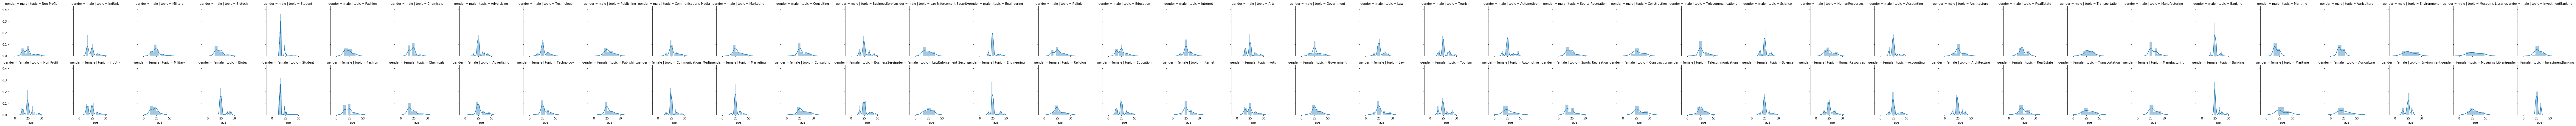

In [13]:
df_bloggers = sf_bloggers['age','gender','topic'].to_dataframe()
g_plot = sns.FacetGrid(df_bloggers, row="gender",  col="topic")
g_plot = g_plot.map(sns.distplot, "age")

# Double-click on the plot to see it better!


**Question 5:** Using the  [SJR Journal Ranking of 2017](https://www.scimagojr.com/journalrank.php) dataset and Seaborn, visualize
    the H-index distributions according to the SJR Best Quartile (15pt). Using a grid, visualize the _Cites / Doc. (2years)_ histograms values of each publisher (15pt).
    


In [0]:
sjr_sf = tc.SFrame.read_csv("scimagojr 2017.csv", delimiter=";")

Unexpected characters after last column. "21100457422"
Parse failed at token ending at: 
	Engineering (Q3); Ocean Engineering (Q3)"
13141;21100457422;^"PEPM 2016 - Proceedings of the 2016 ACM SIGPLAN
Successfully parsed 18 tokens: 
	0: 13140
	1: 63703
	2: Chuan Bo L ...  Mechanics
	3: journal
	4: 10077294
	5: 0,308
	6: Q3
	7: 15
	8: 161
	9: 490
	10: 2487
	11: 149
	12: 490
	13: 0,25
	14: 15,45
	15: China
	16: Chuan bo li xue
	17: Mechanical ... ering (Q3)

1 lines failed to parse correctly

Finished parsing file /content/drive/Team Drives/BigData/scimagojr 2017.csv

Parsing completed. Parsed 100 lines in 0.273558 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,str,str,int,int,int,int,int,int,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "21100457422"
Parse failed at token ending at: 
	Engineering (Q3); Ocean Engineering (Q3)"
13141;21100457422;^"PEPM 2016 - Proceedings of the 2016 ACM SIGPLAN
Successfully parsed 18 tokens: 
	0: 13140
	1: 63703
	2: Chuan Bo L ...  Mechanics
	3: journal
	4: 10077294
	5: 0,308
	6: Q3
	7: 15
	8: 161
	9: 490
	10: 2487
	11: 149
	12: 490
	13: 0,25
	14: 15,45
	15: China
	16: Chuan bo l ... bian ji bu
	17: "Mechanica ... Q3)"
13141

1 lines failed to parse correctly

Finished parsing file /content/drive/Team Drives/BigData/scimagojr 2017.csv

Parsing completed. Parsed 25358 lines in 0.196183 secs.

In [0]:
# Prepare the data

def convert_comma_str_to_float(s):
    try:
        return float(s.replace(",", "."))
    except:
        return 0
    
for i in ["SJR", "Cites / Doc. (2years)", "Ref. / Doc."]:
    sjr_sf[i] = sjr_sf[i].apply(lambda s: convert_comma_str_to_float(s)) # replace "," with "." and convert to float

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


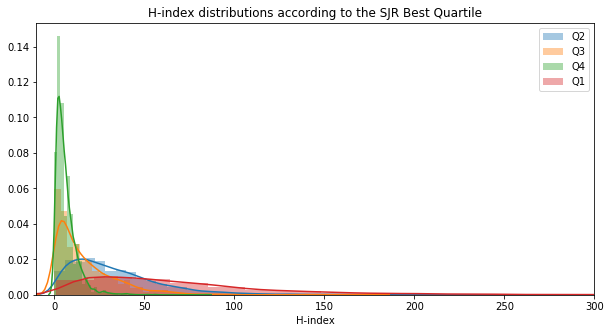

In [0]:
# Visualize the H-index distributions according to the SJR Best Quartile

plt.figure(figsize = (10, 5))

for qrtile in sjr_sf['SJR Best Quartile'].unique():
    if qrtile=='-': continue
    sns.distplot(sjr_sf[sjr_sf['SJR Best Quartile']==qrtile]['H index'], label=qrtile)

plt.xlim(-10, 300)
plt.xlabel('H-index')
plt.title('H-index distributions according to the SJR Best Quartile')
plt.legend()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


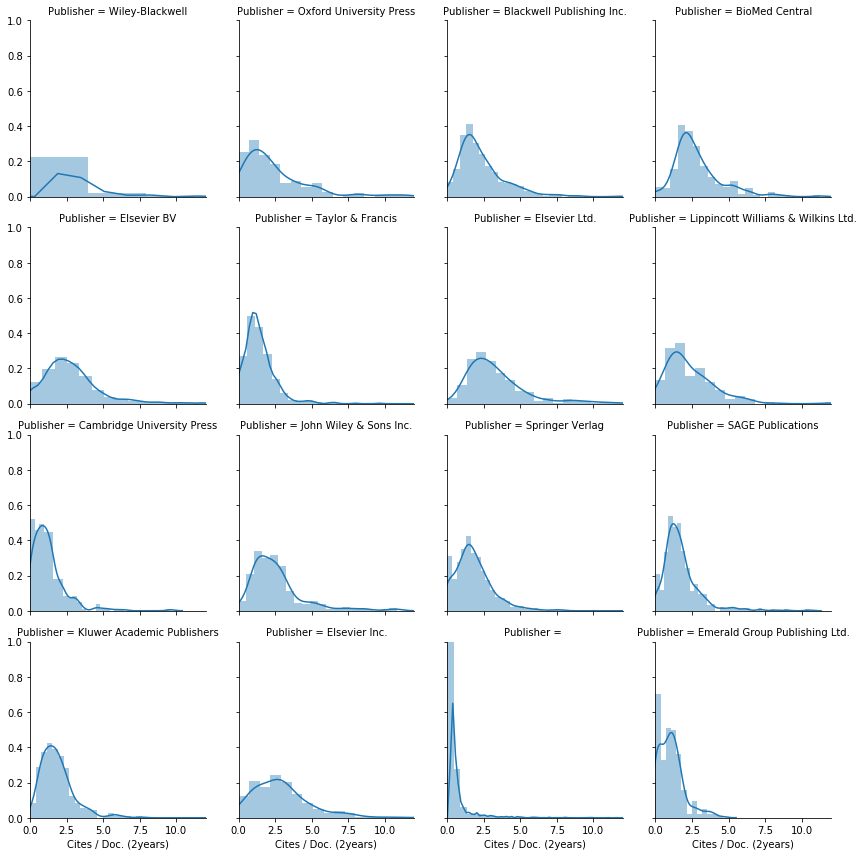

In [0]:
# Visualize the Cites / Doc. (2years) histograms values of each publisher

# I used only the top 16 publishers for the visualisation
publishers = sjr_sf.dropna().groupby('Publisher', {"Count":agg.COUNT()}).topk('Count', k=16, reverse=False)['Publisher']  
ds = sjr_sf.filter_by(publishers, 'Publisher')['Publisher', 'Cites / Doc. (2years)']
ds = ds.to_dataframe()
g = sns.FacetGrid(ds, col="Publisher", col_wrap=4, xlim=(0,12), ylim=(0,1))
g.map(sns.distplot, "Cites / Doc. (2years)")